# Decision Trees

## 1). Implement the decision tree learning algorithm

The decision tree's node is consistute by decision node, which is making branching choice by conditions, and leaf node, which is no child node but shows the final decison result.
Classification and Regression Tree(CART) algorithm is not only using by classification but also regression. For classification, CART use target which is discrete type and select feature by Gini index which is different with ID3 information gain rule.

In [16]:
import numpy as np
# build a decision tree
class DecisionTree():
    def __init__(self, maxDepth, minSplits):
        self.max_depth = maxDepth
        self.min_splits = minSplits
        
    def fit(self, f, l):
        self.feature = f
        self.label = l
        self.data = np.column_stack((self.feature, self.label)) # combine two matrix
        self.buildTree()
        #self.printTree(self.root)
    
    # calculate Gini index
    def giniIndex(self, datas, labels):
        num = sum([len(data) for data in datas]) # get the number of samples
        gini = 0.0
        
        for data in datas:
            size = float(len(data))
            score = 0.0
            if size == 0: # just in case divide by 0
                continue
            for label in labels:
                pro = [i[-1] for i in data].count(label) / size
                score += (pro ** 2)
            # weight the score by relative size
            gini += (1.0 - score) * (size / float(num))
        return gini
    
    # to determine when we should stop: in the max depth or min node
    def terminalNode(self, datas):
        out = [data[-1] for data in datas]
        return max(set(out), key=out.count)
    
    # split a dataset based on feature or feature label
    def getSplit(self, index, val, datas):
        left, right = list(), list()
        for data in datas:
            if data[index] <= val:
                left.append(data)
            else:
                right.append(data)
        return left, right
    
    # select the best split for dataset
    def bestSplit(self, datas):
        labels = list(set(data[-1] for data in datas))
        best_index, best_value, best_score, best_datas = float('inf'), float('inf'), float('inf'), None
        for i in range(len(datas[0])-1):
            for data in datas:
                values = self.getSplit(i, data[i], datas)
                gini = self.giniIndex(values, labels)
                if gini < best_score:
                    best_index, best_value, best_score, best_datas = i, data[i], gini, values
        return {'index': best_index, 'value': best_value, 'data': best_datas}
    
    # split node or make terminal
    def splitBranch(self, node, depth):
        left, right = node['data']
        del(node['data'])
        
        # check in case no left or right, then no split
        if not left or not right:
            node['left'] = node['right'] = self.terminalNode(left + right)
            return
        # check max depth
        if depth >= self.max_depth:
            node['left'], node['right'] = self.terminalNode(left), self.terminalNode(right)
            return
        
        # split left child
        if len(left) <= self.min_splits:
            node['left'] = self.terminalNode(left)
        else:
            node['left'] = self.bestSplit(left)
            self.splitBranch(node['left'], depth+1)
        
        # split right child
        if len(right) <= self.min_splits:
            node['right'] = self.terminalNode(right)
        else:
            node['right'] = self.bestSplit(right)
            self.splitBranch(node['right'], depth+1)
    
    # build a decision tree
    def buildTree(self):
        self.root = self.bestSplit(self.data)
        self.splitBranch(self.root, 1)
        return self.root
    
    # print a decision tree
    def printTree(self, node, depth=0):
        if isinstance(node, dict):
            print('%s[X%d < %.2f]' %((depth*' ', (node['index']+1), node['value'])))
            self.printTree(node['left'], depth+1)
            self.printTree(node['right'], depth+1)
        else:
            print('%s[depth:%s]' %((depth*' ', depth+1)))
    
    # make a prediction
    def predict_helper(self, node, data):
        if data[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.predict_helper(node['left'], data)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.predict_helper(node['right'], data)
            else:
                return node['right']
    
    # classification algorithm
    def predict(self, testData):
        self.pred_label = np.array([])
        for data in testData:
            self.pred_label = np.append(self.pred_label, self.predict_helper(self.root, data))
        return self.pred_label


#def accuracy(pred, actual):
    #correct = 0
    #num = len(pred)
    
    #for i in range(num):
        #if int(pred[i] == actual[i]):
            #correct += 1
    #return correct / num

## 2). Run algorithm on the Iris flower data set

In [17]:
# import the iris dataset
from sklearn.datasets import load_iris
# read the data
iris = load_iris()
# get the features and labels
features, labels = iris.data, iris.target

In [18]:
# split the data into training set and test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

In [19]:
decision_tree_model = DecisionTree(maxDepth=5, minSplits=10)
decision_tree_model.fit(train_features, train_labels)
prediction = decision_tree_model.predict(test_features)

In [20]:
from sklearn.metrics import accuracy_score
#print('Model Accuracy: %.2f'% accuracy(prediction, y_test))
print('Model Accuracy: %.2f'% accuracy_score(test_labels, prediction))

Model Accuracy: 0.90


## 3). Run from scikit-learn

In [6]:
# build CRAT decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
# training
clf = clf.fit(train_features, train_labels)
#tree.plot_tree(clf)

In [7]:
# predicting
test_pred = clf.predict(test_features)

In [8]:
# compare the predicted result with actual result
score = accuracy_score(test_labels, test_pred)
print("CART accuracy: %.2lf" % score)

CART accuracy: 0.97


# Entropy

## Consider training a binary decision tree using entropy splits. 
       
1. Prove that the decrease in entropy by a split on a binary yes/no feature can never be greater than 1 bit. 
Answer: As we learned from lecture, the entrtopy formula is $H(S) = \sum_{x\in X} -p(x)\log_2 p(x)$. We could find that the $p(x)$ would determines the value of $H(s)$, so it will make H(s) = 0 if all splited nodes value are same. If the node value is euqally splited, then the entropy will be 1. For other situation, the entropy should between 0 and 1. Therefore, it can never be greater than 1 bit.
 

2. Generalize this result to the case of arbitrary multiway branching. 
Answer: The entropy formula remains the same and the result is still true. If all splited nodes value are same, the entropy will be 0. If the node value is euqally splited, then the entropy will be 1. For other situation, the entropy should between 0 and 1.

# House Prices Prediction Using Regression Techniques

## 1. Explore the data set and display summary statistics of the data. What can you learn from it on the data? 

In [9]:
import pandas as pd 
df = pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
print(df["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [11]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

First check if there are some missing value or other issues, we found that the data type of last feature "ocean_proximity" is not float. Print the description of float type features and usevalue_count to show "ocean_proximity" information. We could use the maximum and minimm values to determine whether the value of the variable exceeds a reasonable range in real world.

## 2. Compute the correlation between each feature and the target median_house_value. Which features have strong correlation with the target? 

In [12]:
#The df.corr() method displays the correlation between the columns
corr = df.corr()
print(corr['median_house_value'].sort_values(ascending=False), '\n')

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64 



According to the corralation number, we could find that the median_income have strong correlation with the median_house_value. Features total_rooms, housing_median_age, households, and total_bedrooms are positive correlation with median_house_value.

## 3. Which actions do you need to take in order to prepare the data set for the learning algorithm? Identify at least four such actions. 

1) Gathering the data: find several datasets which are public and free.

2) Data cleaning: check if there are some data missing or other issues: including delete abnormal data and remove duplicate data.

3) Feature extraction: make relations between features and extract the strong corrlation with the taget feature.

4) Splitting the data into training and testing sets: split the data to 80-20 percent taning and testing sets.

## 4. Clean the data set using the data preprocessing techniques such that dataset should be trainable. Show a sample of the data set before and after cleaning. 

In [13]:
# check if there has duplicate data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [14]:
# check if there has any Null value
null_all = df.isnull().sum()
print(null_all)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [15]:
# use 0 to make up Null value
fill_data = df.fillna(0)
df = fill_data
# check again
null_all = df.isnull().sum()
print(null_all)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [16]:
# since there is no duplicate, we don't need to drop any data
# extract all rows and columns except target feature.
#X = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
x = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
print(x)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  
0   

In [17]:
# extract the target feature 
y = df[['median_house_value']]
print(y)

       median_house_value
0                452600.0
1                358500.0
2                352100.0
3                341300.0
4                342200.0
...                   ...
20635             78100.0
20636             77100.0
20637             92300.0
20638             84700.0
20639             89400.0

[20640 rows x 1 columns]


## 5. Extract at least two new features from the data set that have strong correlation with the target feature. 

In [18]:
# display first three features are the most positively correlated with median_house_value
print(corr['median_house_value'].sort_values(ascending=False)[:4], '\n')

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
Name: median_house_value, dtype: float64 



In [19]:
dataset = x.drop(['households','total_bedrooms','population','longitude','latitude'], 1)
print(dataset)

       housing_median_age  total_rooms  median_income
0                    41.0        880.0         8.3252
1                    21.0       7099.0         8.3014
2                    52.0       1467.0         7.2574
3                    52.0       1274.0         5.6431
4                    52.0       1627.0         3.8462
...                   ...          ...            ...
20635                25.0       1665.0         1.5603
20636                18.0        697.0         2.5568
20637                17.0       2254.0         1.7000
20638                18.0       1860.0         1.8672
20639                16.0       2785.0         2.3886

[20640 rows x 3 columns]


## 6. Run linear regression on the transformed data set. Use 80% of the data set as your training set and 20% as your test set. Compute RMSE and R-Square score both on the training and the test tests. 

In [20]:
# standardizes the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
#data_x = pd.DataFrame(X, columns=x.columns)

In [21]:
# split the data to 80% traning and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# Creating and Training the Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
predictions = model.predict(X_test)

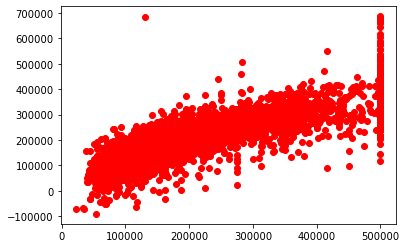

In [24]:
import matplotlib.pyplot as plt
#test predictions by comparing with actual value (y_test)
plt.scatter(y_test,predictions, c='r')

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
# print RMSE and R-squared for testing set
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared:', r2_score(y_test, predictions))

RMSE: 68946.37763629333
R-squared: 0.6382564434514031


In [26]:
# print RMSE and R-squared for training set
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))
print('R-squared:', r2_score(y_train, model.predict(X_train)))

RMSE: 69964.06611674232
R-squared: 0.6335617026942261


## 7. Does adding regularization improve the results (ridge regression in this case)? If yes, which value of lambda provides the best RMSE on the test set? If no, what is the reason for it? 

In [27]:
# use GridSearchCV to check the best value of lambda
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge_regression = Ridge()
param_ridge = {'alpha': list(10**i for i in range(-2,3))}
r_gs = GridSearchCV(ridge_regression, param_grid=param_ridge)
r_gs.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [28]:
# check the best lambda
r_gs.best_params_

{'alpha': 10}

In [37]:
# use the best param to train the model
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [38]:
pred = ridge_model.predict(X_test)

In [39]:
# print RMSE and R-squared for testing set
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R-squared:', r2_score(y_test, pred))

RMSE: 68955.34975346006
R-squared: 0.6381622886353501


In [40]:
# print RMSE and R-squared for training set
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, ridge_model.predict(X_train))))
print('R-squared:', r2_score(y_train, ridge_model.predict(X_train)))

RMSE: 69964.7068708835
R-squared: 0.6335549907363685


According to the data displayed, we could see the ridge regression in this case did not improve too much the results.The goal of the regularization (ridge regression in this case) is to avoid overfitting and thus better prediction on the independent. Since ridge regression didn;t improve model too much, I guess overfitting is not problem in here but is underfitting since we have much more samples than features and there features cannot predict very well, more complex model might predict better.

## 8. Now replace linear regression with DecisionTreeRegressor (in sklearn. tree). What is the RMSE on the training and test this time? Which phenomenon is observed here? 

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
dtr_pred = dtr.predict(X_test)

In [43]:
# print RMSE and R-squared for testing set
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print('R-squared:', r2_score(y_test, dtr_pred))

RMSE: 65945.98275235524
R-squared: 0.669055943506331


In [44]:
# print RMSE and R-squared for training set
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, dtr.predict(X_train))))
print('R-squared:', r2_score(y_train, dtr.predict(X_train)))

RMSE: 0.0
R-squared: 1.0


The DecisionTreeRegressor did improve our results a little but the model is still underfitting. Next step we might try to combine some features or try more complex model.